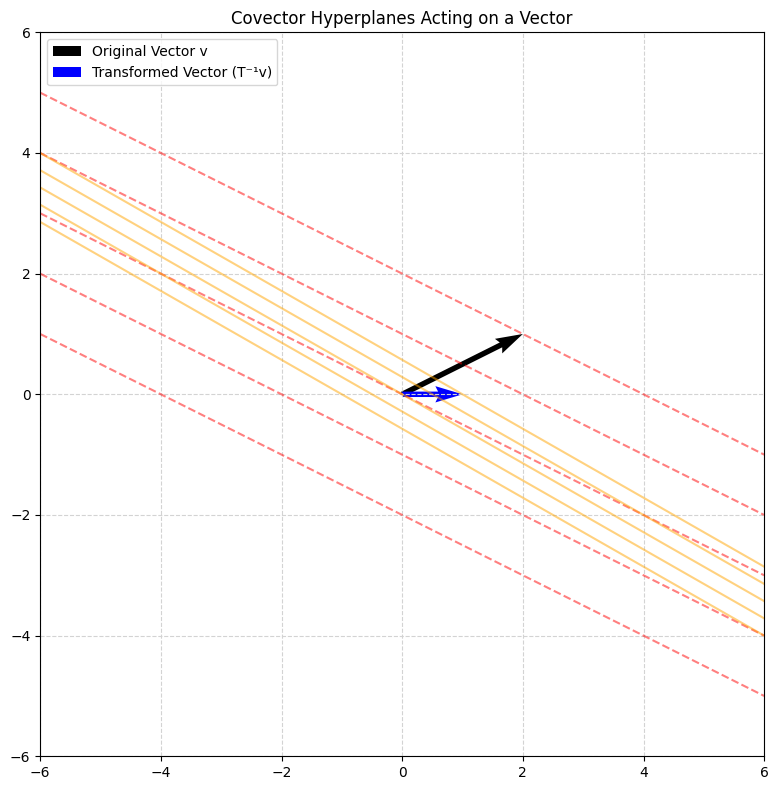

In [4]:
#contra variant transformation
import numpy as np
import matplotlib.pyplot as plt

# Define the original vector (could represent velocity)
v = np.array([2, 1])

# Define a covector (e.g., gradient), acting as a row vector
omega = np.array([1, 2])  # Covector acts via dot product

# Define transformation matrix (new basis)
T = np.array([[2, 1],
              [1, 3]])

# Transformations
T_inv = np.linalg.inv(T)
v_contra = T_inv @ v          # Contravariant transformation of vector
omega_co = omega @ T          # Covariant transformation of covector

# Evaluate inner product (should be the same before and after transformation)
original_action = omega @ v
transformed_action = omega_co @ v_contra

# Set up the plot
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
ax.set_aspect('equal')
ax.grid(True, linestyle='--', color='lightgray')
ax.set_title("Covector Hyperplanes Acting on a Vector")

# Plot original vector
ax.quiver(0, 0, *v, color='black', angles='xy', scale_units='xy', scale=1, label='Original Vector v')

# Plot covector hyperplanes (omega • x = const)
x_vals = np.linspace(-6, 6, 400)
for c in [-4, -2, 0, 2, 4]:
    # Line: omega[0] * x + omega[1] * y = c → y = (c - omega[0]*x)/omega[1]
    y_vals = (c - omega[0] * x_vals) / omega[1]
    ax.plot(x_vals, y_vals, 'r--', alpha=0.5)

# Plot vector after transformation
ax.quiver(0, 0, *v_contra, color='blue', angles='xy', scale_units='xy', scale=1, label='Transformed Vector (T⁻¹v)')

# Plot transformed covector hyperplanes (omega_co • x = const)
for c in [-4, -2, 0, 2, 4]:
    y_vals_transformed = (c - omega_co[0] * x_vals) / omega_co[1]
    ax.plot(x_vals, y_vals_transformed, 'orange', alpha=0.5)

# Add legend and show
ax.legend(loc='upper left')
plt.tight_layout()
plt.show()


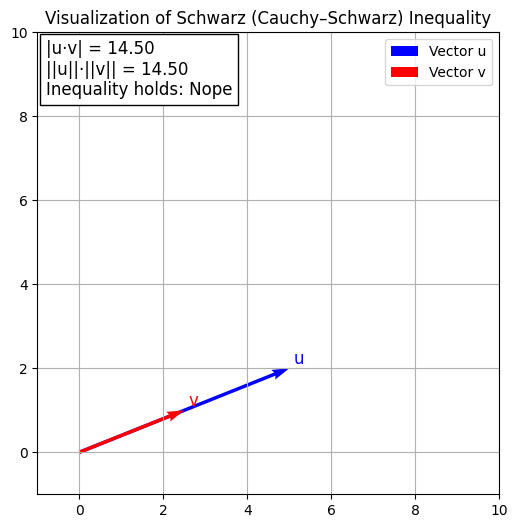

In [18]:
#Schwarz’s inequality#
import numpy as np
import matplotlib.pyplot as plt

# Define two 2D vectors
u = np.array([5, 2])
v = np.array([2.5, 1])

# Compute dot product and magnitudes
dot_product = np.dot(u, v)
norm_u = np.linalg.norm(u)
norm_v = np.linalg.norm(v)
rhs = norm_u * norm_v

# Plot setup
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(-1, 10)
ax.set_ylim(-1, 10)
ax.set_aspect('equal')
ax.grid(True)
ax.set_title("Visualization of Schwarz (Cauchy–Schwarz) Inequality")

# Plot vectors u and v
ax.quiver(0, 0, *u, angles='xy', scale_units='xy', scale=1, color='blue', label='Vector u')
ax.quiver(0, 0, *v, angles='xy', scale_units='xy', scale=1, color='red', label='Vector v')

# Add labels
ax.text(*(u + 0.1), 'u', color='blue', fontsize=12)
ax.text(*(v + 0.1), 'v', color='red', fontsize=12)

# Show the inequality as text
text = f"|u·v| = {abs(dot_product):.2f}\n||u||·||v|| = {rhs:.2f}\n"
text += "Inequality holds: " + ("✔️" if abs(dot_product) <= rhs else "Nope")

ax.text(-0.8, 8.5, text, fontsize=12, bbox=dict(facecolor='white', edgecolor='black'))

ax.legend()
plt.show()
